In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../01-intro/car_fuel_efficiency.csv")

In [3]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [4]:
cols = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]

<Axes: >

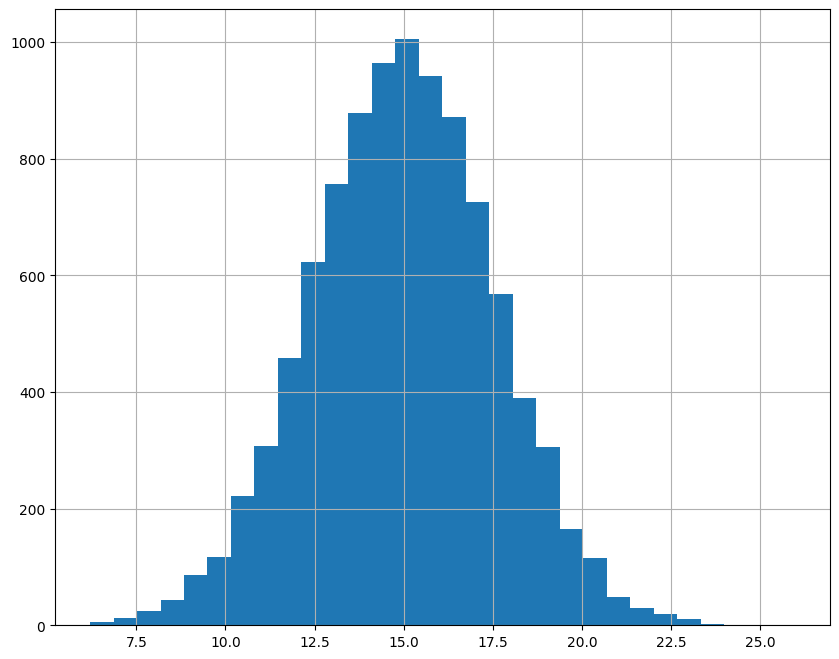

In [5]:
#  Look at the `fuel_efficiency_mpg` variable. Does it have a long tail? 
df['fuel_efficiency_mpg'].hist(bins=30, figsize=(10, 8))

### Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`

In [6]:
df[cols].isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 49
- 99
- 149
- 199

In [7]:
df['horsepower'].median()

np.float64(149.0)

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [8]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [9]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [10]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [11]:
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
483,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
7506,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
8795,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
1688,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
6217,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209


In [12]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [13]:
df_train_fill_0 = df_train.copy()
df_train_fill_0['horsepower'] = df_train_fill_0['horsepower'].fillna(0)
df_train_fill_median = df_train.copy()
df_train_fill_median['horsepower'] = df_train_fill_median['horsepower'].fillna(df_train_fill_median['horsepower'].median())

df_val_fill_0 = df_val.copy()
df_val_fill_0['horsepower'] = df_val_fill_0['horsepower'].fillna(0)
df_val_fill_median = df_val.copy()
df_val_fill_median['horsepower'] = df_val_fill_median['horsepower'].fillna(df_train_fill_median['horsepower'].median())

df_test_fill_0 = df_test.copy()
df_test_fill_0['horsepower'] = df_test_fill_0['horsepower'].fillna(0)
df_test_fill_median = df_test.copy()
df_test_fill_median['horsepower'] = df_test_fill_median['horsepower'].fillna(df_train_fill_median['horsepower'].median())

In [14]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [15]:
df_train_fill_0.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [16]:
cols = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]
cols_train = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year'
]

In [17]:
# TEST 1 (fill with 0)
y_train = df_train_fill_0.fuel_efficiency_mpg.values
y_val = df_val_fill_0.fuel_efficiency_mpg.values
y_test = df_test_fill_0.fuel_efficiency_mpg.values

In [18]:
w0, w = train_linear_regression(df_train_fill_0[cols_train], y_train)

In [19]:
y_pred = w0 + df_train_fill_0[cols_train].dot(w)

In [21]:
w0, w

(np.float64(28.827365474598718),
 array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992869e-04]))

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: ylabel='Count'>

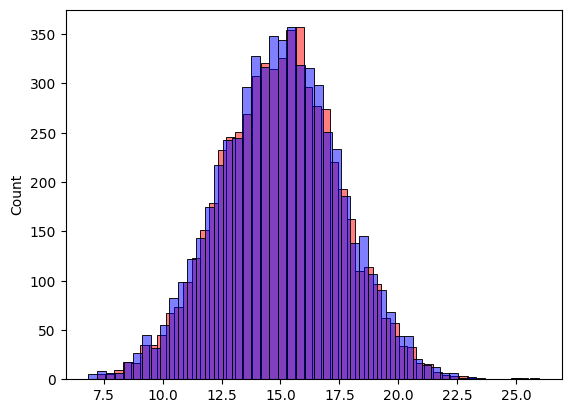

In [23]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [24]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [26]:
round(rmse(y_train, y_pred), 2)

np.float64(0.52)

In [28]:
# TEST 2 (fill with median)
y_train = df_train_fill_median.fuel_efficiency_mpg.values
y_val = df_val_fill_median.fuel_efficiency_mpg.values
y_test = df_test_fill_median.fuel_efficiency_mpg.values

In [29]:
w0, w = train_linear_regression(df_train_fill_median[cols_train], y_train)

In [30]:
y_pred = w0 + df_train_fill_median[cols_train].dot(w)

In [31]:
w0, w

(np.float64(28.9249258024533),
 array([ 0.00012113,  0.01030247, -0.00501007, -0.00023427]))

<Axes: ylabel='Count'>

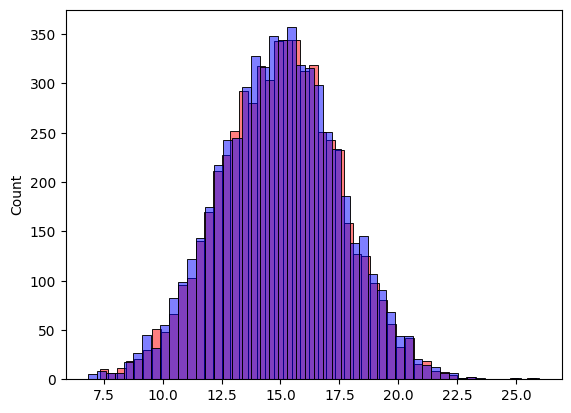

In [32]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [33]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [34]:
round(rmse(y_train, y_pred), 2)

np.float64(0.46)

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [35]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [36]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_reg(df_train_fill_0[cols_train], y_train, r=r)
    y_pred = w0 + df_train_fill_0[cols_train].dot(w)
    print(r, round(rmse(y_train, y_pred), 4))

0 0.5203
0.01 0.5204
0.1 0.5235
1 0.5279
5 0.5287
10 0.5288
100 0.5289


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

In [37]:
# * We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
# * Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
# * For each seed, do the train/validation/test split with 60%/20%/20% distribution.
# * Fill the missing values with 0 and train a model without regularization.
# * For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
# * What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
# * Round the result to 3 decimal digits (`round(std, 3)`)

# What's the value of std?

# - 0.001
# - 0.006
# - 0.060
# - 0.600


scores = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)

    df_train_fill_0 = df_train.copy()
    df_train_fill_0['horsepower'] = df_train_fill_0['horsepower'].fillna(0)
    df_val_fill_0 = df_val.copy()
    df_val_fill_0['horsepower'] = df_val_fill_0['horsepower'].fillna(0)

    y_train = df_train_fill_0.fuel_efficiency_mpg.values
    y_val = df_val_fill_0.fuel_efficiency_mpg.values

    w0, w = train_linear_regression(df_train_fill_0[cols_train], y_train)
    y_pred = w0 + df_val_fill_0[cols_train].dot(w)
    score = rmse(y_val, y_pred)
    scores.append(score)

std = np.std(scores)
round(std, 3)

np.float64(0.007)

In [38]:
# ### Question 6

# * Split the dataset like previously, use seed 9.
# * Combine train and validation datasets.
# * Fill the missing values with 0 and train a model with `r=0.001`. 
# * What's the RMSE on the test dataset?

# Options:

# - 0.15
# - 0.515
# - 5.15
# - 51.5

np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train+n_val]].reset_index(drop=True)
df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)
df_train_fill_0 = df_train.copy()
df_train_fill_0['horsepower'] = df_train_fill_0['horsepower'].fillna(0)
df_test_fill_0 = df_test.copy()
df_test_fill_0['horsepower'] = df_test_fill_0['horsepower'].fillna(0)
y_train = df_train_fill_0.fuel_efficiency_mpg.values
y_test = df_test_fill_0.fuel_efficiency_mpg.values
w0, w = train_linear_regression_reg(df_train_fill_0[cols_train], y_train, r=0.001)
y_pred = w0 + df_test_fill_0[cols_train].dot(w)
round(rmse(y_test, y_pred), 3)

np.float64(0.516)